<a href="https://colab.research.google.com/github/YagyanshB/tensorflow-freecodecamp/blob/main/core_tensorflow_alogirthms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Core Learning Algorithms:

The algorithms to be focussed on currently are:

1. Linear Regression
2. Classification
3. Clustering
4. Hidden Markov Models

# Linear Regression:

This is one of the most basic forms of machine learning model and is used to predict numeric values.

Line of Best Fit refers to a line through a scattered plot of data points that best expresses the relationship betweenn those points.

``` y = mx + b```



In [1]:
# importing the required libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

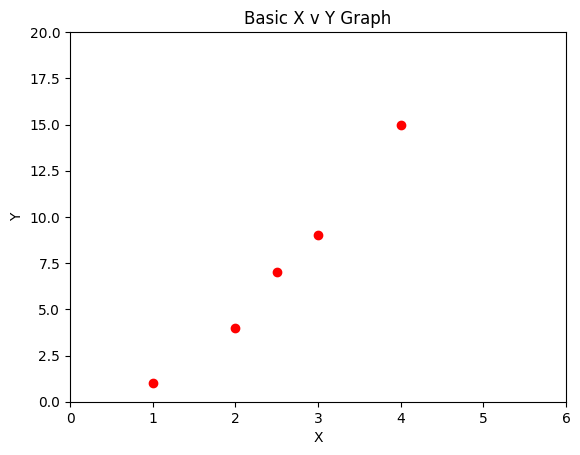

In [2]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]

plt.plot(x,y, 'ro')
plt.axis([0,6,0,20])
plt.title('Basic X v Y Graph')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

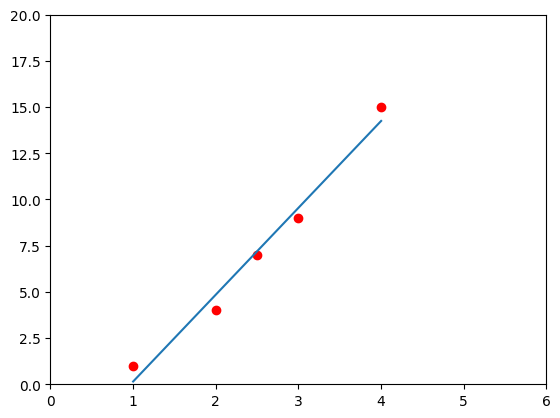

In [3]:
# example of line of best fit

plt.plot(x, y, 'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [4]:
# importing libraries for core tensorflow algorithms

from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

# Data:

The dataset that will be focussed on this instance is the **Titanic Dataset** as it contains loads of information on every passenger aboard the **Titanic**.

In [10]:
# uploading the dataset in our environment

dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_test = dftest.pop('survived')

In [11]:
# inspecting the rows of our different datasets

dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [12]:
dftest.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [15]:
dftest.shape

(264, 9)

In [17]:
dftrain.shape

(627, 9)

In [18]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [19]:
dftest.describe()

,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


In [20]:
y_train.shape

(627,)

In [21]:
y_test.shape

(264,)

In [22]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [23]:
y_test.head()

,survived
0,0
1,0
2,1
3,1
4,1


In [24]:
dftrain.loc[0]

,0
sex,male
age,22.0
n_siblings_spouses,1
parch,0
fare,7.25
class,Third
deck,unknown
embark_town,Southampton
alone,n


In [39]:
y_train.loc[0]

0

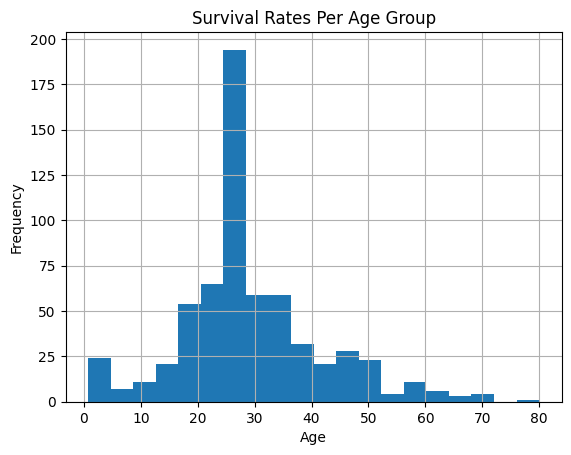

In [42]:
dftrain.age.hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Survival Rates Per Age Group')
plt.show()

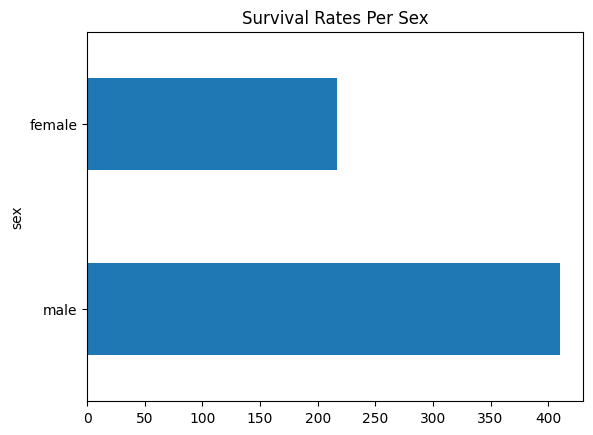

In [47]:
dftrain.sex.value_counts().plot(kind='barh')
plt.title('Survival Rates Per Sex')
plt.show()

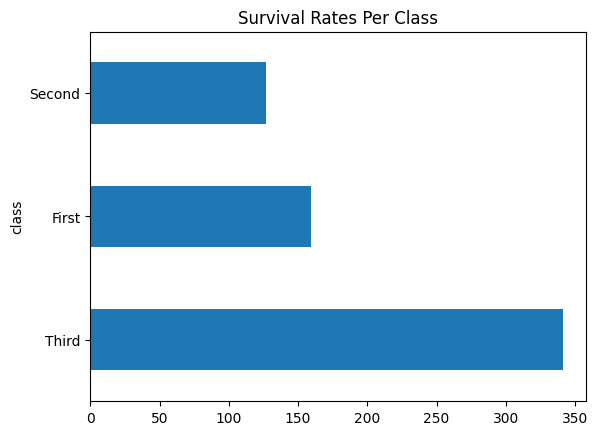

In [48]:
dftrain['class'].value_counts().plot(kind='barh')
plt.title('Survival Rates Per Class')
plt.show()

In [50]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


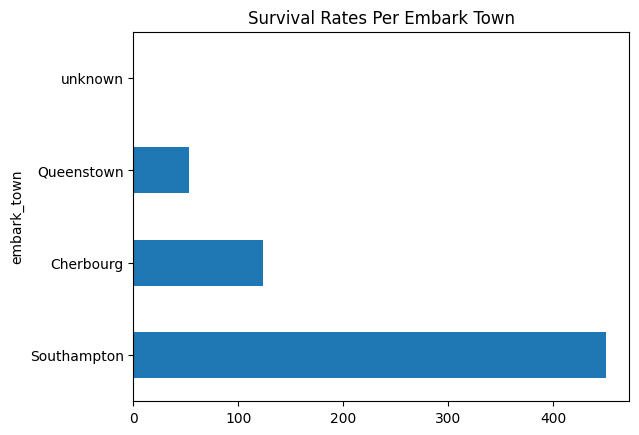

In [55]:
dftrain['embark_town'].value_counts().plot(kind = 'barh')
plt.title('Survival Rates Per Embark Town')
plt.show()

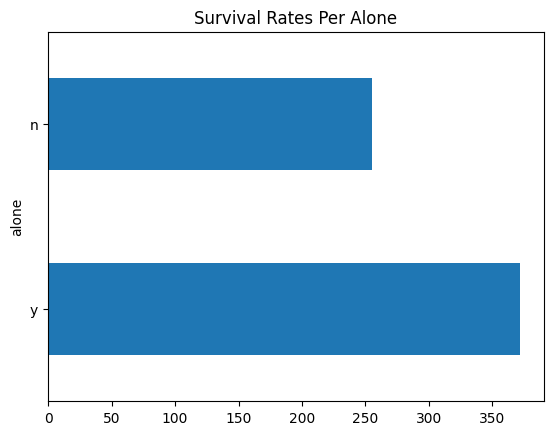

In [56]:
dftrain['alone'].value_counts().plot(kind = 'barh')
plt.title('Survival Rates Per Alone')
plt.show()

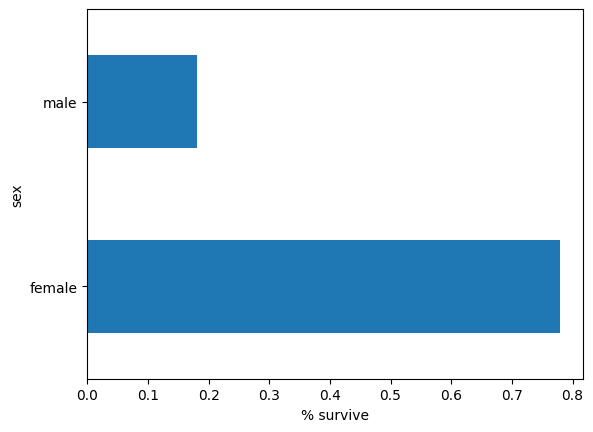

In [58]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')
plt.show()

In [62]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


# Training vs Testing Data:

When training models we require two sets of data. The first one being **Training Data** and the second being **Testing Data**.

The **Training Data** is what we feed into the model so that it can develop and learn. This typically tends to be larger in size than the testing data.

The **Testing Data** is what we use to evaluate the model and see how well it is performing.

# Feature Columns:

Our current dataset has two different kinds of columns:

1. Categorical
2. Numerical

In [65]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERICAL_COLUMNS = ['age', 'fare']

In [75]:
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype = tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [76]:
import keras

In [78]:
vocabulary

array(['n', 'y'], dtype=object)

In [81]:
dftrain['n_siblings_spouses'].unique()

array([1, 0, 3, 4, 2, 5, 8])

# Training Process:

An **epoch** is simply one stream of our dataset. The number of **epochs** we define is the number of times our model will see the entire dataset.


Example: If our model has **10 epochs**, the model will see the dataset 10 times.

As we will be feeding the data in batches, we need to create an **input function** The input function simple defines how our dataset will be converted into batches at each epoch.

In [83]:
# creating the input function

def make_input_fn(data_df, label_df, num_epochs = 10, shuffle = True, batch_size = 32):
  def input_function(): # inner function which will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(100)
    ds = ds.batch(batch_size).repeat(num_epochs) # splits dataset into batches of 32 and repeats for the specified number of epochs
    return ds # retrun a batch of the dataset
  return input_function # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dftest, y_test, num_epochs=1, shuffle = False)